In [2]:
# Linear Regression 
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [4]:
df = pd.read_csv("data/weight-height.csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


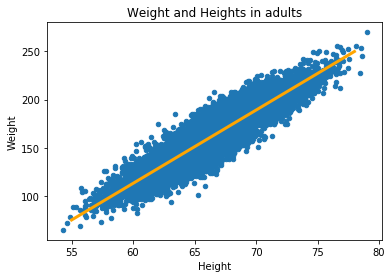

In [10]:
df.plot(
    kind='scatter',
    x='Height',
    y='Weight',
    title='Weight and Heights in adults'
)

plt.plot([55, 78], [75, 250], color='orange', linewidth=3)

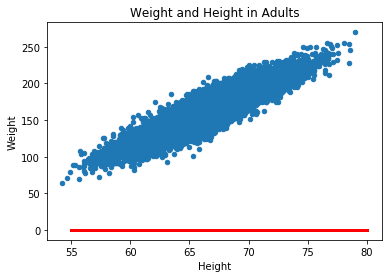

In [13]:
def line(x, w=0, b=0):
    return x * w + b

x = np.linspace(55, 80, 100)
yhat = line(x)

df.plot(
    kind='scatter',
    x='Height',
    y='Weight',
    title='Weight and Height in Adults'
)
plt.plot(x, yhat, color='red', linewidth=3)

In [14]:
def mean_squared_error(y_true, y_repd):
    s = (y_true - y_pred) ** 2
    return s.mean()

In [18]:
x =df [['Height']].values 
y_true = df[['Weight']].values

In [19]:
y_true

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [20]:
y_pred = line(x)

In [21]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [24]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

Text(0.5,0,'b')

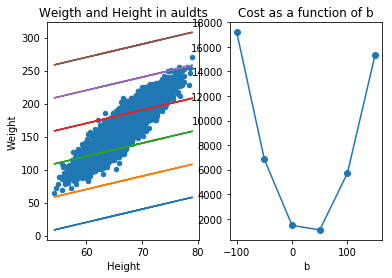

In [29]:
ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weigth and Height in auldts', ax=ax1)

bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []
for b in bbs:
    y_pred = line(x, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

<h1>Linear Regression With Keras</h1>

In [30]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

/home/qinritukou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
model = Sequential() 
model.add(Dense(1, input_shape=(1,)))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [35]:
model.fit(x, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 48us/step - loss: 188.9354
Epoch 2/40
10000/10000 [==============================] - 0s 45us/step - loss: 181.3062
Epoch 3/40
10000/10000 [==============================] - 0s 46us/step - loss: 181.2124
Epoch 4/40
10000/10000 [==============================] - 0s 46us/step - loss: 179.1104
Epoch 5/40
10000/10000 [==============================] - 1s 54us/step - loss: 177.6687
Epoch 6/40
10000/10000 [==============================] - 0s 50us/step - loss: 181.4195
Epoch 7/40
10000/10000 [==============================] - 1s 50us/step - loss: 176.1776
Epoch 8/40
10000/10000 [==============================] - 0s 47us/step - loss: 188.2132
Epoch 9/40
10000/10000 [==============================] - 0s 46us/step - loss: 174.3830
Epoch 10/40
10000/10000 [==============================] - 0s 48us/step - loss: 186.4751
Epoch 11/40
10000/10000 [==============================] - 0s 47us/step - loss: 177.9938
Epoch 12/40
10000/10000 [=====

In [36]:
y_pred = model.predict(x)

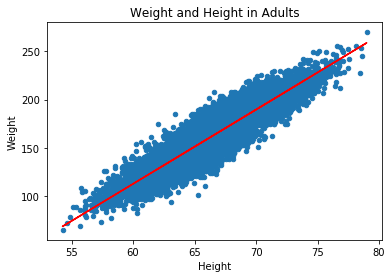

In [39]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in Adults')
plt.plot(x, y_pred, color='red')

In [40]:
W, B = model.get_weights()

In [41]:
W

array([[7.708431]], dtype=float32)

In [43]:
B

array([-349.96805], dtype=float32)

<h1>Evaulating Model Performance</h1>

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2)

In [47]:
len(X_train)

8000

In [50]:
W[0, 0] = 0.0 
B[0] = 0.0 
model.set_weights((W, B))

In [51]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [52]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [53]:
from sklearn.metrics import mean_squared_error as mse 

In [54]:
print("Mean Squared Error on the Train set is :{:0.1f}".format(mse(y_train_pred, y_train)))
print("Mean Squared Error on the Test  set is :{:0.1f}".format(mse(y_test_pred, y_test)))

Mean Squared Error on the Train set is :180.3
Mean Squared Error on the Test  set is :171.4
